## 1. Importing Libraries

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

## 2. Reading Image

Hand Image Sample
Image Dimension (1600, 1200, 3)


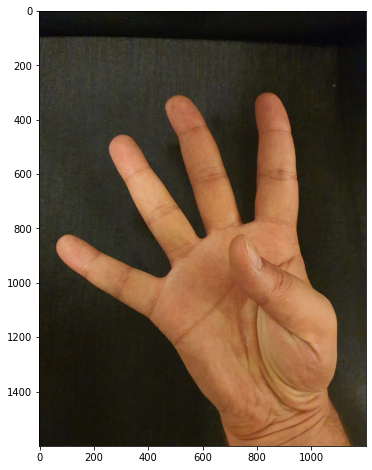

In [23]:
img_path = "images/4finger_hand_sample.jpeg"
img = cv.imread(img_path)

print("Hand Image Sample")
print("Image Dimension", img.shape)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## 3. Skin Mask
Masking is used for highlighting specific color on image. In our case it will be the skin color.

&emsp; **a. Changing `BGR` (blue, green, red) image to HSV (hue, saturation, value)**

Sample image in HSV
(1600, 1200, 3)


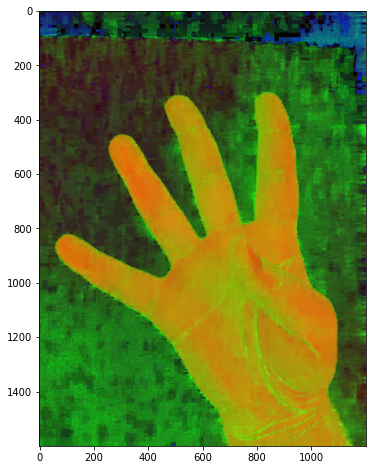

In [24]:
hsvim = cv.cvtColor(img, cv.COLOR_BGR2HSV)

print("Sample image in HSV")
print(hsvim.shape)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
plt.imshow(cv.cvtColor(hsvim, cv.COLOR_BGR2RGB))
plt.show()

&emsp; **b. Initializing upper and lower values for skin color**

In [25]:
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")


&emsp; **c. Detect skin on the range of lower and upper pixel values in the HSV colorspace. Also Applying blur to improve masking**

(1600, 1200)
Skin Detection in HSV Colorspace


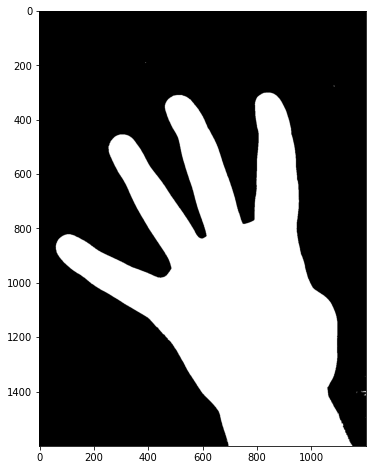

In [26]:
skinRegionHSV = cv.inRange(hsvim, lower, upper)
print(skinRegionHSV.shape)
#kernel = np.ones((5,5),np.float32)/25
#print(kernel)
#print(kernel.shape)
#blurred = cv.filter2D(skinRegionHSV, -1, kernel)

 
#cv.GaussianBlur(skinRegionHSV,(2,2),0)
#cv.blur(skinRegionHSV, (2,2))

print("Skin Detection in HSV Colorspace")
#print(blurred.shape)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
plt.imshow(cv.cvtColor(skinRegionHSV, cv.COLOR_BGR2RGB))
plt.show()

&emsp; **d. Thresholding the image. We are applying binary Threshold to clear out discrepencies and gray values.**

Image after applying threshold
(1600, 1200)


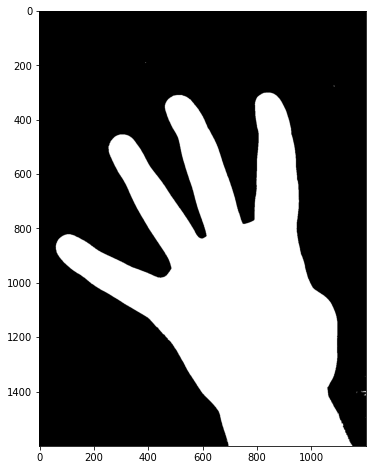

In [27]:
ret,thresh = cv.threshold(skinRegionHSV,0,255,cv.THRESH_BINARY)

print("Image after applying threshold")
print(thresh.shape)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
plt.imshow(cv.cvtColor(thresh, cv.COLOR_BGR2RGB))
plt.show()

## 4. Countours
Now we will find the contours on the image based on our threshold.

Displaying Contours on the image


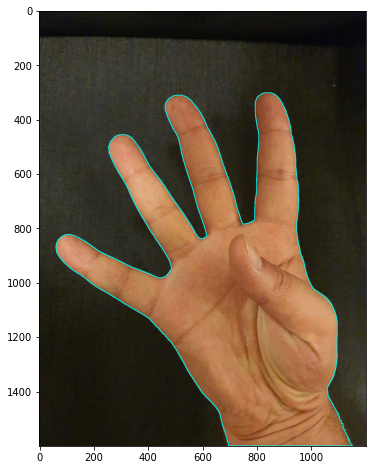

In [9]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=cv.contourArea)
cv.drawContours(img, [contours], -1, (255,255,0), 2)

print("Displaying Contours on the image")
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()